In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


import matplotlib as mpl
import matplotlib.cm as cm
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 10

from Funciones import *

In [3]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'
ruta_imagenes = ruta_base + 'Imagenes/'

In [4]:
# Carga información
datos_pcs = pd.read_csv(ruta_datos+'Datos_PCS.csv', index_col=0, parse_dates=True)

In [5]:
# pcs utilizadas
pcs_util =  ['PC1', 'PC2', 'PC18', 'PC9', 'PC6', 'PC16', 'PC7', 'PC8', 'Caudal']

datos_pcs = datos_pcs[pcs_util]

## Supongamos que solo nos interesa las inundaciones

In [6]:
datos_clasif = datos_pcs.copy()
p10, p90     = datos_pcs['Caudal'].quantile([0.1,0.9])
datos_clasif['Caudal'][datos_pcs['Caudal']>=p90]=1
datos_clasif['Caudal'][datos_pcs['Caudal']<p90]=0

# datos_clasif['Caudal'][datos_pcs['Caudal']<=p10]=-1 # eventos extremos minimos
# datos_clasif['Caudal'][datos_pcs['Caudal']>=p90]=1 # eventos extremos máximos
# datos_clasif['Caudal'][(datos_pcs['Caudal']>p10)&(datos_pcs['Caudal']<p90)] = 0 # demás puntos

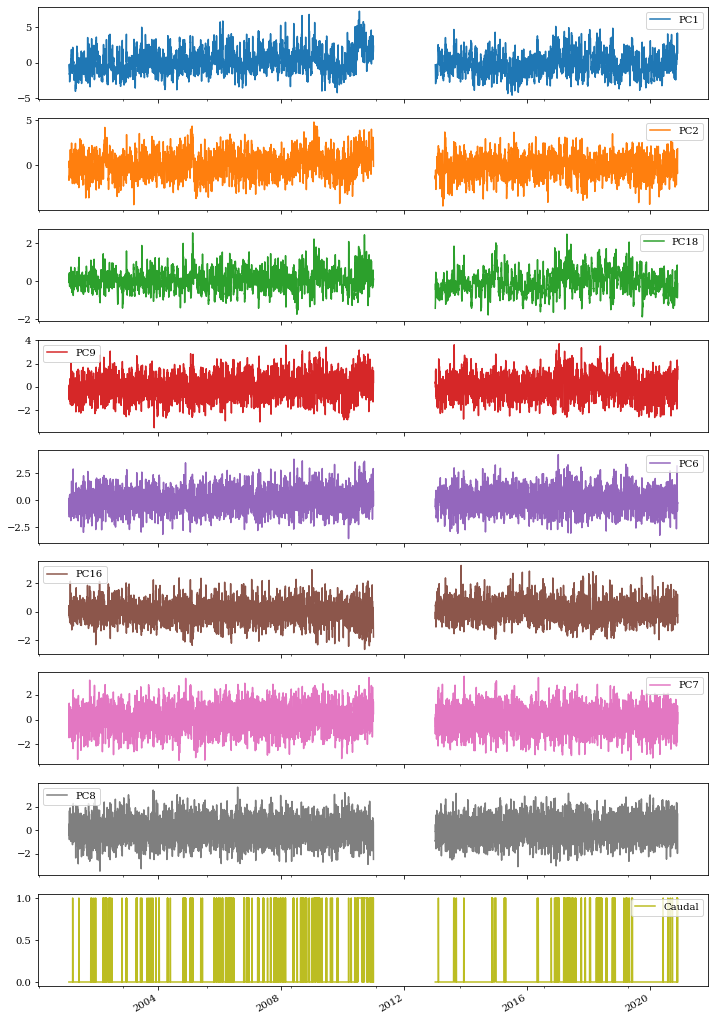

In [7]:
pcs_y_gra = datos_clasif.copy()
pcs_y_gra.loc['2013-01-01',:] = np.nan
pcs_y_gra.index = pd.DatetimeIndex(pcs_y_gra.index)
pcs_y_gra.plot(subplots=True, figsize=(12,20))
plt.savefig(ruta_imagenes+'Series_PCs_clasif_max.png', bbox_inches='tight', dpi=150)

In [8]:
# datos_clasif['Caudal'].plot(marker='o', ls='', figsize=(12,1))
# plt.legend()

### Definición de variables independientes y dependiente

In [9]:
X = datos_clasif.drop(['Caudal'],axis=1)
y = datos_clasif['Caudal']

In [10]:
y.value_counts()

0.0    5847
1.0     650
Name: Caudal, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
kfold = KFold(n_splits=5, shuffle= False)

### Definir tipo de arreglo para el balanceo

In [13]:
# lr=LogisticRegression()
# results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_train,y_train)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_clasif_max.png', bbox_inches='tight', dpi=150)

### Regresión logistica balanceada

In [14]:
# lr=LogisticRegression(class_weight='balanced')
# results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_train,y_train)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_balance_clasif_max.png', bbox_inches='tight', dpi=150)

### undersamplig

In [15]:
# from imblearn.under_sampling import RandomUnderSampler
# rus=RandomUnderSampler()
# X_rus,y_rus=rus.fit_sample(X_train,y_train)

# lr=LogisticRegression()
# results = cross_val_score(lr, X_rus, y_rus, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_rus,y_rus)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_under_max.png', bbox_inches='tight', dpi=150)

### SMOTE

In [16]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# X_sm, y_sm = sm.fit_sample(X_train, y_train)

# lr=LogisticRegression()
# results = cross_val_score(lr, X_sm, y_sm, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_sm,y_sm)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_smote_max.png', bbox_inches='tight', dpi=150)

### Oversampling

In [17]:
# from imblearn.over_sampling import RandomOverSampler
# ros=RandomOverSampler()
# X_ros,y_ros=ros.fit_sample(X_train,y_train)

# results = cross_val_score(lr, X_ros, y_ros, cv=kfold, scoring='accuracy')
# print(results)
# print(results.mean())

# model=lr.fit(X_ros,y_ros)
# y_test_pred=model.predict(X_test)
# print(Counter(y_test_pred))

# mc= confusion_matrix(y_test, y_test_pred)
# print(mc)

# #  figura de matriz de confución
# plt.figure(figsize=(5,5))
# sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_over_max.png', bbox_inches='tight', dpi=150)


## Mejor desempeño oversamplig

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_sample(X_train,y_train)

## Regresión logistica

### Modelo

Counter({0.0: 1685, 1.0: 265})
[[1646  160]
 [  39  105]]


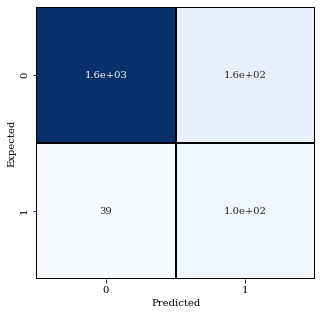

In [19]:
lr=LogisticRegression()
model=lr.fit(X_ros,y_ros)
y_test_pred=model.predict(X_test)
print(Counter(y_test_pred))

mc= confusion_matrix(y_test, y_test_pred)
print(mc)

#  figura de matriz de confución
plt.figure(figsize=(5,5))
sns.heatmap(mc, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.savefig(ruta_imagenes+'MC_lr_over_max.png', bbox_inches='tight', dpi=150)


[0.86456401 0.7816945  0.89665842 0.80321782 0.81373762]
0.8319744729574999
[0.87234043 0.90232558 0.926      0.80321782 0.81373762]
0.8635242904943636


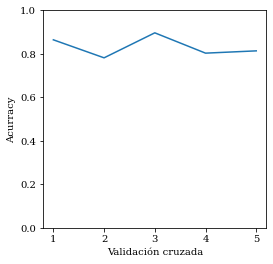

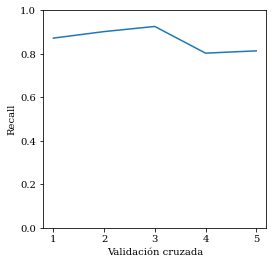

In [21]:
results = cross_val_score(lr, X_ros, y_ros, cv=kfold, scoring='accuracy')
print(results)
print(results.mean())

# Figura de score en la validación cruzada

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,len(results)+1), results)
plt.xlabel('Validación cruzada')
plt.ylabel('Acurracy')
plt.ylim([0,1])
plt.savefig(ruta_imagenes+'Validacion_cruzada_lr_clasif.png', bbox_inches='tight', dpi=150)

results = cross_val_score(lr, X_ros, y_ros, cv=kfold, scoring='recall')
print(results)
print(results.mean())

# Figura de score en la validación cruzada

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,len(results)+1), results)
plt.xlabel('Validación cruzada')
plt.ylabel('Recall')
plt.ylim([0,1])
plt.savefig(ruta_imagenes+'Validacion_cruzada_lr_clasif_recall.png', bbox_inches='tight', dpi=150)

### Curva de aprendizaje

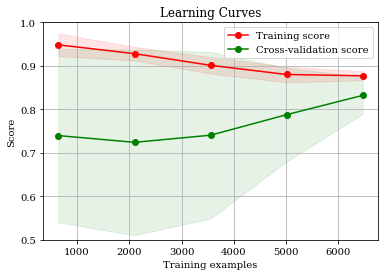

In [22]:
from sklearn.model_selection import learning_curve

lc = learning_curve(lr,X_ros, y_ros,cv=kfold)
train_sizes, train_scores, test_scores = lc[0], lc[1], lc[2]
lc

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim([0.5,1])
plt.legend(loc="best");
# plt.savefig(ruta_imagenes+'Curva_aprendizaje_clasif_max.png', bbox_inches='tight', dpi=150)

### periodo de prueba

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      1806
         1.0       0.40      0.73      0.51       144

    accuracy                           0.90      1950
   macro avg       0.69      0.82      0.73      1950
weighted avg       0.93      0.90      0.91      1950

          fpr       tpr     1-fpr        tf  threshold
146  0.143965  0.854167  0.856035 -0.001869   0.327157
[0.3271570173546574]


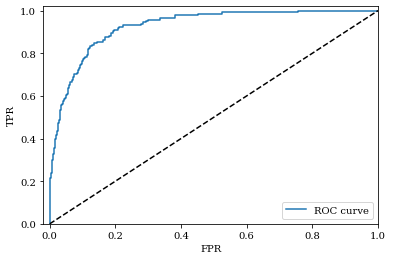

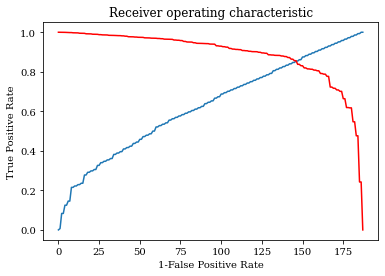

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

probs=model.predict_proba(X_test)
y_pred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);
plt.savefig(ruta_imagenes+'ROC_maximos.png', bbox_inches='tight', dpi=150)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
best=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print(best)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'],label='TPR')
plt.plot(roc['1-fpr'], color = 'red',label='1-FPR')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# ax.set_xticklabels([]);

best_threshold=list(best['threshold'])
print(best_threshold)


## Analisis discriminante

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)
data_projected = LDA.fit_transform(X_ros,y_ros)
print(data_projected.shape)

(8082, 1)


In [26]:
# dataframe
df = pd.DataFrame(np.concatenate((data_projected, np.atleast_2d(y_ros.values).T), axis=1), columns = ['LDA', 'Ocurrencia'])

In [27]:
data_sin=df[(df['Ocurrencia']==0)]
data_con=df[(df['Ocurrencia']==1)]

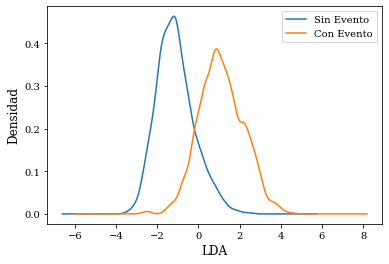

In [28]:
fig, ax = plt.subplots()
data_sin['LDA'].plot.kde(ax=ax, label='Sin Evento')
data_con['LDA'].plot.kde(ax=ax, label='Con Evento')
# ax.set_xlim(0,90)
ax.set_xlabel('LDA', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

[[1660  146]
 [  43  101]]


Text(25.0, 0.5, 'Expected')

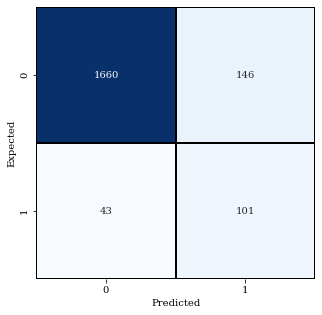

In [29]:
y_test_pred = LDA.predict(X_test)

mc= confusion_matrix(y_test, y_test_pred)
print(mc)

#  figura de matriz de confución
plt.figure(figsize=(5,5))
sns.heatmap(mc, annot=True, fmt='d', cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
# plt.savefig(ruta_imagenes+'MC_lr_over_max.png', bbox_inches='tight', dpi=150)

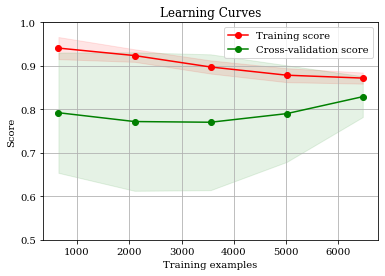

In [30]:
from sklearn.model_selection import learning_curve

lc = learning_curve(LDA,X_ros, y_ros,cv=kfold)
train_sizes, train_scores, test_scores = lc[0], lc[1], lc[2]
lc

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim([0.5,1])
plt.legend(loc="best");
# plt.savefig(ruta_imagenes+'Curva_aprendizaje_clasif_max.png', bbox_inches='tight', dpi=150)

[0.87260359 0.7903525  0.89851485 0.78960396 0.79579208]
0.8293733965233259
[0.87234043 0.90232558 0.926      0.80321782 0.81373762]
0.8635242904943636


(0.0, 1.0)

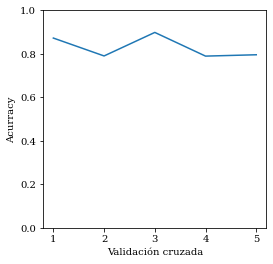

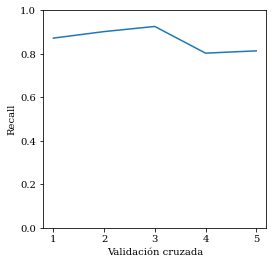

In [31]:
results = cross_val_score(LDA, X_ros, y_ros, cv=kfold, scoring='accuracy')
print(results)
print(results.mean())

# Figura de score en la validación cruzada

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,len(results)+1), results)
plt.xlabel('Validación cruzada')
plt.ylabel('Acurracy')
plt.ylim([0,1])
# plt.savefig(ruta_imagenes+'Validacion_cruzada_lr_clasif.png', bbox_inches='tight', dpi=150)

results = cross_val_score(lr, X_ros, y_ros, cv=kfold, scoring='recall')
print(results)
print(results.mean())

# Figura de score en la validación cruzada

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,len(results)+1), results)
plt.xlabel('Validación cruzada')
plt.ylabel('Recall')
plt.ylim([0,1])
# plt.savefig(ruta_imagenes+'Validacion_cruzada_lr_clasif_recall.png', bbox_inches='tight', dpi=150)

In [32]:
#calcular la probabilidad para cada clase
y_prob=LDA.predict_proba(X_test)
prob_si=LDA.predict_proba(X_test)[:,1]

## KNN (Vecino más cercano)

### Prueba de hiperparametros con vecino más cercano

In [28]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

k = np.arange(2,20,2)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X_ros, y_ros, param_name='n_neighbors', param_range=k, cv=kfold)


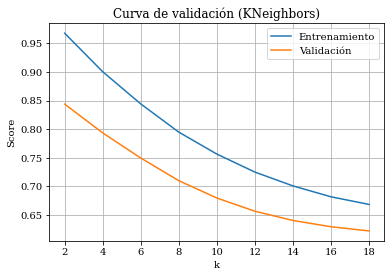

In [29]:
plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
#plt.ylim(0, 1)
plt.xticks(np.arange(9),k)
plt.legend(loc="best")
plt.grid(True);
plt.savefig(ruta_imagenes+'Curva_val_hiper_Kneig_max.png', bbox_inches='tight', dpi=150)